In [2]:
import numpy as np
import pandas as pd

In [9]:
df=pd.read_csv('user_behavior_dataset.csv')
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [11]:
df.shape

(700, 11)

In [15]:
df.dtypes

User ID                         int64
Device Model                   object
Operating System               object
App Usage Time (min/day)        int64
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)         int64
Number of Apps Installed        int64
Data Usage (MB/day)             int64
Age                             int64
Gender                         object
User Behavior Class             int64
dtype: object

In [19]:
missing_data=df.isnull()
missing_data_counts=missing_data.sum()
print(missing_data_counts)

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64


In [21]:
for column in missing_data.columns.values.tolist():
      if(missing_data[column].any()):
        print(column)
        print(df[column].dtypes)

In [23]:
Premis_Cd_mean1=df['App Usage Time (min/day)'].astype('float').mean(axis=0)
df['App Usage Time (min/day)']=df['App Usage Time (min/day)'].replace(np.nan,Premis_Cd_mean1)

In [27]:
Premis_Cd_mean2=df['Screen On Time (hours/day)'].astype('float').mean(axis=0)
df['Screen On Time (hours/day)']=df['Screen On Time (hours/day)'].replace(np.nan,Premis_Cd_mean2)
# Premis_Cd_mean3=df['Battery Drain (mAh/day)'].astype('float').mean(axis=0)
# df['Battery Drain (mAh/day)']=df['Battery Drain (mAh/day))'].replace(np.nan,Premis_Cd_mean3)
Premis_Cd_mean4=df['Number of Apps Installed'].astype('float').mean(axis=0)
df['Number of Apps Installed']=df['Number of Apps Installed'].replace(np.nan,Premis_Cd_mean4)
Premis_Cd_mean5=df['Data Usage (MB/day)'].astype('float').mean(axis=0)
df['Data Usage (MB/day)']=df['Data Usage (MB/day)'].replace(np.nan,Premis_Cd_mean5)
Premis_Cd_mean6=df['Age'].astype('float').mean(axis=0)
df['Age']=df['Age'].replace(np.nan,Premis_Cd_mean6)
Premis_Cd_mean7=df['Age'].astype('float').mean(axis=0)
df['Age']=df['Age'].replace(np.nan,Premis_Cd_mean7)

In [29]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

(0.0, 12.55)

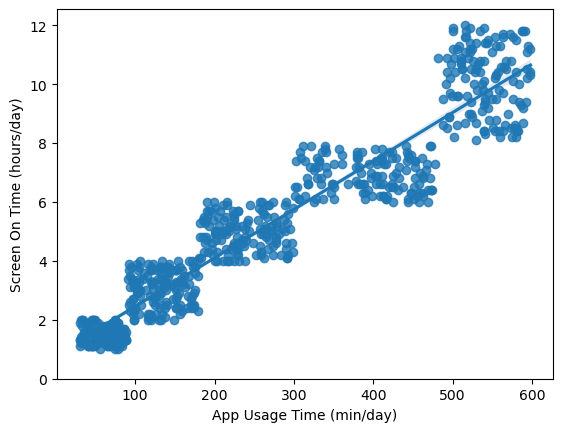

In [39]:

sns.regplot(x="App Usage Time (min/day)",y="Screen On Time (hours/day)",data=df)
plt.ylim(0,)

(0.0, 103.45)

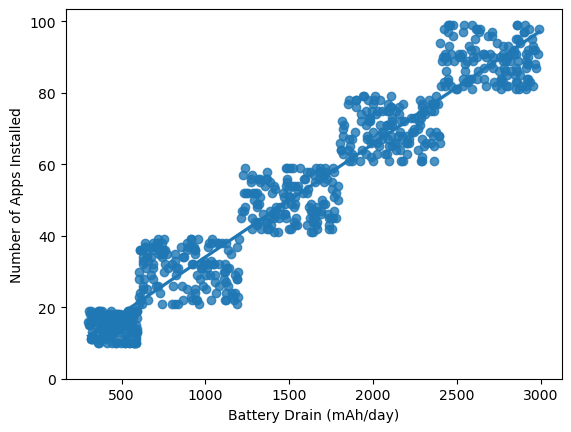

In [41]:

sns.regplot(x="Battery Drain (mAh/day)",y="Number of Apps Installed",data=df)
plt.ylim(0,)

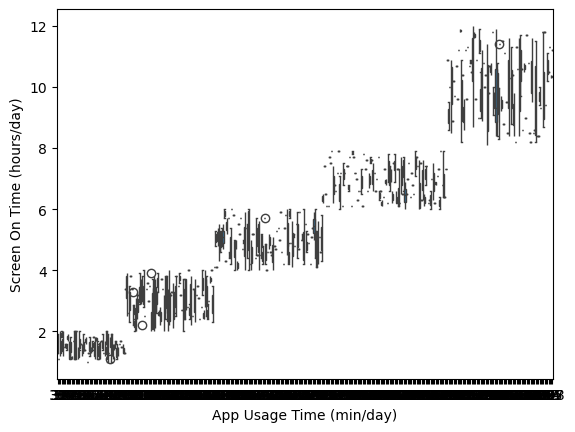

In [43]:
sns.boxplot(x='App Usage Time (min/day)',y='Screen On Time (hours/day)',data=df)
plt.show()

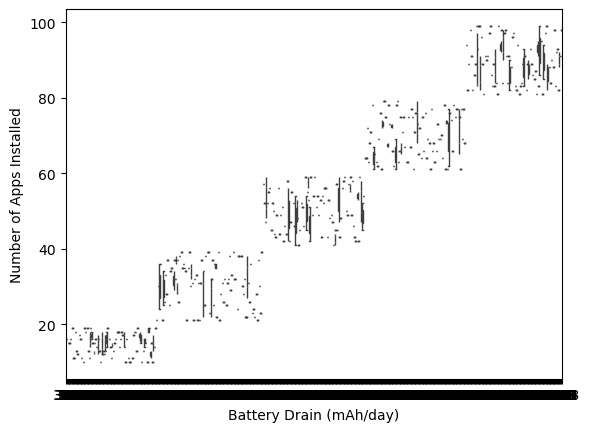

In [45]:
sns.boxplot(x='Battery Drain (mAh/day)',y='Number of Apps Installed',data=df)
plt.show()

/var/folders/85/6yj4846s59j7c4k3yk5b7pqh0000gn/T/ipykernel_66540/3524679316.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], hist=True)


<Axes: xlabel='Age', ylabel='Density'>

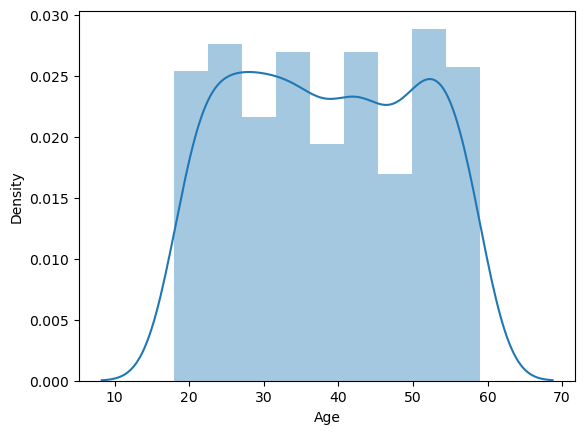

In [49]:
sns.distplot(df['Age'], hist=True)

<Axes: xlabel='Age', ylabel='Count'>

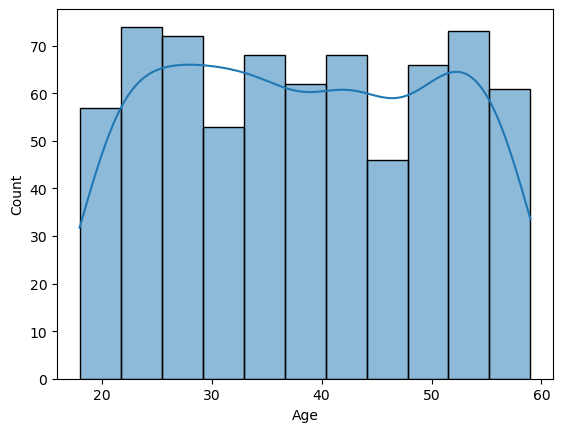

In [51]:
sns.histplot(df['Age'], kde=True)

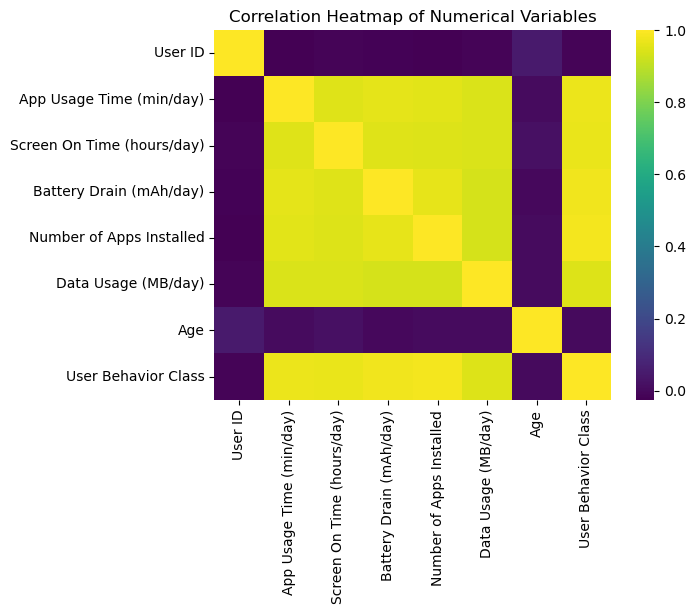

In [53]:
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
corr_matrix=numeric_cols.corr()
sns.heatmap(corr_matrix, annot=False, cmap='viridis')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

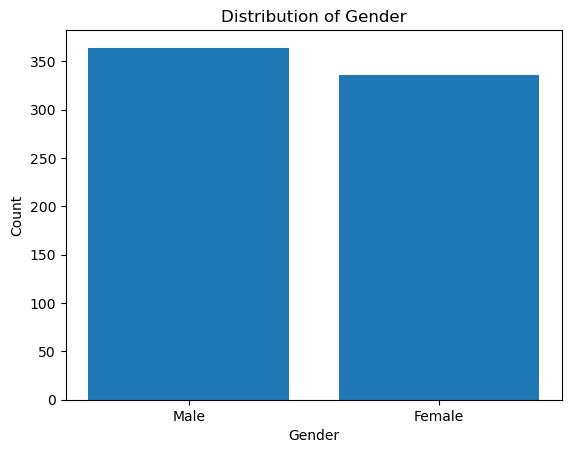

In [55]:
counts=df['Gender'].value_counts()
plt.bar(counts.index, counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

<Axes: xlabel='Operating System', ylabel='Count'>

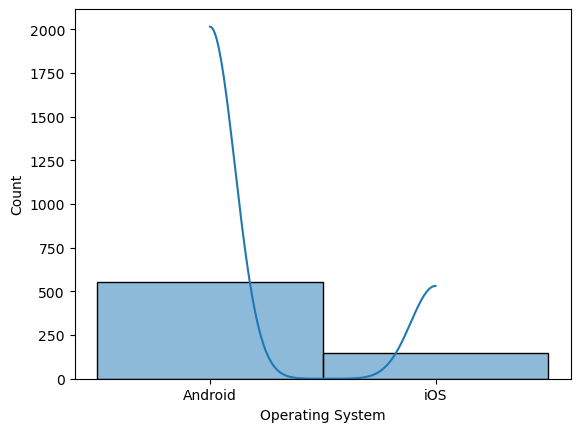

In [57]:
sns.histplot(df['Operating System'],kde=True)

In [59]:
numerical_cols=df.select_dtypes(include=['int64','float64'])
corr_matrix=numerical_cols.corr()
corr_matrix

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
User ID,1.000000,-0.024957,-0.014287,-0.019377,-0.023914,-0.014527,0.045188,-0.016242
App Usage Time (min/day),-0.024957,1.000000,0.950333,0.956385,0.955253,0.942308,0.004382,0.970498
Screen On Time (hours/day),-0.014287,0.950333,1.000000,0.948983,0.946975,0.941322,0.017232,0.964581
Battery Drain (mAh/day),-0.019377,0.956385,0.948983,1.000000,0.961853,0.932276,-0.002722,0.978587
Number of Apps Installed,-0.023914,0.955253,0.946975,0.961853,1.000000,0.934800,0.004034,0.981255
Data Usage (MB/day),-0.014527,0.942308,0.941322,0.932276,0.934800,1.000000,0.003999,0.946734
Age,0.045188,0.004382,0.017232,-0.002722,0.004034,0.003999,1.000000,-0.000563
User Behavior Class,-0.016242,0.970498,0.964581,0.978587,0.981255,0.946734,-0.000563,1.000000


In [61]:
cross_tab=pd.crosstab(df['Device Model'],df['Operating System'])
print(cross_tab)

Operating System    Android  iOS
Device Model                    
Google Pixel 5          142    0
OnePlus 9               133    0
Samsung Galaxy S21      133    0
Xiaomi Mi 11            146    0
iPhone 12                 0  146


In [63]:
from scipy import stats

In [65]:
pearson_coef,p_value=stats.pearsonr(df['Battery Drain (mAh/day)'],df['Number of Apps Installed'])
print("The pearson Correlation coefficient is ",pearson_coef," with a P value of ",p_value)

The pearson Correlation coefficient is  0.9618532619047168  with a P value of  0.0


In [67]:
pearson_coef,p_value=stats.pearsonr(df['Data Usage (MB/day)'],df['User Behavior Class'])
print("The pearson Correlation coefficient is ",pearson_coef," with a P value of ",p_value)

The pearson Correlation coefficient is  0.9467338349891804  with a P value of  0.0


conclusion->The data set was first cleaned and then all the columns were analysed agains each other and individually.
The dependence of different variables are checked and clearly stated.